In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
# Aplica configuración standard de seaborn
sns.set()
pd.options.display.float_format = '{:.2f}'.format

### Parte 1 Ejercicio 1

In [17]:
gapminder_csv_url = "http://bit.ly/2cLzoxH" 
gapminder = pd.read_csv(gapminder_csv_url)
gapminder.head(10)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.00,Asia,28.80,779.45
1,Afghanistan,1957,9240934.00,Asia,30.33,820.85
2,Afghanistan,1962,10267083.00,Asia,32.00,853.10
3,Afghanistan,1967,11537966.00,Asia,34.02,836.20
4,Afghanistan,1972,13079460.00,Asia,36.09,739.98
5,Afghanistan,1977,14880372.00,Asia,38.44,786.11
6,Afghanistan,1982,12881816.00,Asia,39.85,978.01
7,Afghanistan,1987,13867957.00,Asia,40.82,852.40
8,Afghanistan,1992,16317921.00,Asia,41.67,649.34
9,Afghanistan,1997,22227415.00,Asia,41.76,635.34


In [18]:
gapminder.info()
gapminder.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


,year,pop,lifeExp,gdpPercap
count,1704.00,1704.00,1704.00,1704.00
mean,1979.50,29601212.33,59.47,7215.33
std,17.27,106157896.75,12.92,9857.45
min,1952.00,60011.00,23.60,241.17
25%,1965.75,2793664.00,48.20,1202.06
50%,1979.50,7023595.50,60.71,3531.85
75%,1993.25,19585221.75,70.85,9325.46
max,2007.00,1318683096.00,82.60,113523.13


In [19]:
# Esta información no resulta muy útil estadisticamente, debido a que los datos no están correctamente agrupados.

### Parte 1 Ejercicio 2

In [20]:
gapminder = pd.read_csv(gapminder_csv_url)
gapminder_grouped = gapminder.groupby("year").mean(numeric_only=True)
gapminder_grouped.head(10)

,pop,lifeExp,gdpPercap
year,,,
1952,16950402.47,49.06,3725.28
1957,18763412.54,51.51,4299.41
1962,20421006.86,53.61,4725.81
1967,22658298.48,55.68,5483.65
1972,25189979.99,57.65,6770.08
1977,27676378.92,59.57,7313.17
1982,30207301.69,61.53,7518.90
1987,33038573.37,63.21,7900.92
1992,35990917.32,64.16,8158.61


In [21]:
# Si intentamos hacer un groupby, de forma predeterminada se intenta calcular el valor promedio de las celdas agrupadas.
# Entonces, si tenemos variables no númericas, nos lanzará error.

In [22]:
# Podemos solucionarlo incorporando esas columnas como indices tambien, creando un multi-indice.
gapminder = pd.read_csv(gapminder_csv_url)
gapminder_grouped = gapminder.groupby(["year","continent","country"], as_index=True).mean()
gapminder_grouped.head(10)

pop  lifeExp  gdpPercap
year continent country                                                
1952 Africa    Algeria                  9279525.00    43.08    2449.01
               Angola                   4232095.00    30.02    3520.61
               Benin                    1738315.00    38.22    1062.75
               Botswana                  442308.00    47.62     851.24
               Burkina Faso             4469979.00    31.98     543.26
               Burundi                  2445618.00    39.03     339.30
               Cameroon                 5009067.00    38.52    1172.67
               Central African Republic 1291695.00    35.46    1071.31
               Chad                     2682462.00    38.09    1178.67
               Comoros                   153936.00    40.72    1102.99

In [25]:
#Podemos tambien sacar las columnas que nos estorban del df
gapminder = pd.read_csv(gapminder_csv_url)
gapminder.drop(['continent','country'],inplace=True,axis=1)
#Generamos un df con estadisticas globales promedio por año
gapminder_grouped = gapminder.groupby(["year"], as_index=True).mean()
gapminder_grouped.head(12)

,pop,lifeExp,gdpPercap
year,,,
1952,16950402.47,49.06,3725.28
1957,18763412.54,51.51,4299.41
1962,20421006.86,53.61,4725.81
1967,22658298.48,55.68,5483.65
1972,25189979.99,57.65,6770.08
1977,27676378.92,59.57,7313.17
1982,30207301.69,61.53,7518.90
1987,33038573.37,63.21,7900.92
1992,35990917.32,64.16,8158.61


In [ ]:
#Este ya es más interesante de analizar estadisticamente

### Parte 1 Ejercicio 3

In [28]:
# Se nos pide obtener la suma (la cantidad), la media y la mediana para cada año.
gapminder = pd.read_csv(gapminder_csv_url)
gapminder.drop(['continent','country'],inplace=True,axis=1)
#Para la suma
gapminder_sum = gapminder.groupby(["year"], as_index=True).sum()
print(gapminder_sum.head(12))
#Para la media
gapminder_mean = gapminder.groupby(["year"], as_index=True).mean()
print(gapminder_mean.head(12))
#Para la mediana
gapminder_median = gapminder.groupby(["year"], as_index=True).median()
print(gapminder_median.head(12))

               pop  lifeExp  gdpPercap
year                                  
1952 2406957151.00  6966.18  528989.20
1957 2664404580.00  7314.05  610515.98
1962 2899782974.00  7612.51  671065.35
1967 3217478384.00  7906.32  778678.73
1972 3576977158.00  8185.93  961351.76
1977 3930045807.00  8458.96 1038469.63
1982 4289436840.00  8737.71 1067684.04
1987 4691477418.00  8976.19 1121930.67
1992 5110710260.00  9110.77 1158522.41
1997 5515204472.00  9232.08 1290804.90
2002 5886977579.00  9328.68 1408334.47
2007 6251013179.00  9515.05 1658570.20
             pop  lifeExp  gdpPercap
year                                
1952 16950402.47    49.06    3725.28
1957 18763412.54    51.51    4299.41
1962 20421006.86    53.61    4725.81
1967 22658298.48    55.68    5483.65
1972 25189979.99    57.65    6770.08
1977 27676378.92    59.57    7313.17
1982 30207301.69    61.53    7518.90
1987 33038573.37    63.21    7900.92
1992 35990917.32    64.16    8158.61
1997 38839468.11    65.01    9090.18
2002 41457

In [29]:
gapminder.groupby('year').agg(['sum', 'mean','median'])

pop                         lifeExp               gdpPercap   
               sum        mean      median     sum  mean median        sum   
year                                                                         
1952 2406957151.00 16950402.47  3943953.00 6966.18 49.06  45.14  528989.20  \
1957 2664404580.00 18763412.54  4282942.00 7314.05 51.51  48.36  610515.98   
1962 2899782974.00 20421006.86  4686039.50 7612.51 53.61  50.88  671065.35   
1967 3217478384.00 22658298.48  5170175.50 7906.32 55.68  53.83  778678.73   
1972 3576977158.00 25189979.99  5877996.50 8185.93 57.65  56.53  961351.76   
1977 3930045807.00 27676378.92  6404036.50 8458.96 59.57  59.67 1038469.63   
1982 4289436840.00 30207301.69  7007320.00 8737.71 61.53  62.44 1067684.04   
1987 4691477418.00 33038573.37  7774861.50 8976.19 63.21  65.83 1121930.67   
1992 5110710260.00 35990917.32  8688686.50 9110.77 64.16  67.70 1158522.41   
1997 5515204472.00 38839468.11  9735063.50 9232.08 65.01  69.39 1290804.90   
2002 5886977579.00 41457588.58 10372918.50 9328.68 65.69  70.83 1408334.47   
2007 6251013179.00 44021219.57 10517531.00 9515.05 67.01  71.94 1658570.20   

                       
         mean  median  
year                   
1952  3725.28 1968.53  
1957  4299.41 2173.22  
1962  4725.81 2335.44  
1967  5483.65 2678.33  
1972  6770.08 3339.13  
1977  7313.17 3798.61  
1982  7518.90 4216.23  
1987  7900.92 4280.30  
1992  8158.61 4386.09  
1997  9090.18 4781.83  
2002  9917.85 5319.80  
2007 11680.07 6124.37

In [ ]:
# Podemos comparar la tabla 2 (promedio) con tabla 3 (mediana)
# Si la mediana es menor al promedio, tenemos una distribución sesgada a la izquierda
# Se la mediana es mayor al promedio, tenemos una distribución sesgada ala derecha

### Parte 1 Ejercicio 4

In [37]:
#Para los datos de 1967
gapminder = pd.read_csv(gapminder_csv_url)
gapminder_grouped = gapminder.groupby(["year","continent","country"], as_index=True).mean()
#No me resultó el get_group, volviendo al viejo y confiable
print(gapminder_grouped)
round(gapminder_grouped.loc[1967,"Americas","Chile"],2)

                                      pop  lifeExp  gdpPercap
year continent country                                       
1952 Africa    Algeria         9279525.00    43.08    2449.01
               Angola          4232095.00    30.02    3520.61
               Benin           1738315.00    38.22    1062.75
               Botswana         442308.00    47.62     851.24
               Burkina Faso    4469979.00    31.98     543.26
...                                   ...      ...        ...
2007 Europe    Switzerland     7554661.00    81.70   37506.42
               Turkey         71158647.00    71.78    8458.28
               United Kingdom 60776238.00    79.42   33203.26
     Oceania   Australia      20434176.00    81.23   34435.37
               New Zealand     4115771.00    80.20   25185.01

[1704 rows x 3 columns]


pop         8858908.00
lifeExp          60.52
gdpPercap      5106.65
Name: (1967, Americas, Chile), dtype: float64

In [38]:
#Probando otro año, 1992, el año en que yo nací
round(gapminder_grouped.loc[1992,"Americas","Chile"],2)

pop         13572994.00
lifeExp           74.13
gdpPercap       7596.13
Name: (1992, Americas, Chile), dtype: float64

### Parte 2 Ejercicio 1

In [39]:
gapminder = pd.read_csv(gapminder_csv_url)
gapminder.drop(['country','year'],inplace=True,axis=1)
table = pd.pivot_table(data=gapminder,index=["continent"])
table

,gdpPercap,lifeExp,pop
continent,,,
Africa,2193.75,48.87,9916003.14
Americas,7136.11,64.66,24504795.00
Asia,7902.15,60.06,77038721.97
Europe,14469.48,71.90,17169764.73
Oceania,18621.61,74.33,8874672.33


In [40]:
# Sacar exceso de decimales y notación cientifica
rounded_table = np.round(table,2)
rounded_table

,gdpPercap,lifeExp,pop
continent,,,
Africa,2193.75,48.87,9916003.14
Americas,7136.11,64.66,24504795.00
Asia,7902.15,60.06,77038721.97
Europe,14469.48,71.90,17169764.73
Oceania,18621.61,74.33,8874672.33


In [43]:
#Cambiamos función de np.mean por np.sum para columna de población para ver población continental
#Se puede incorporar round en la misma linea
table2 = np.round(pd.pivot_table(data=gapminder,index=["continent"],
                        aggfunc={"gdpPercap":np.mean, "lifeExp":np.mean,'pop':np.sum}),2)
table2

,gdpPercap,lifeExp,pop
continent,,,
Africa,2193.75,48.87,6187585961.00
Americas,7136.11,64.66,7351438499.00
Asia,7902.15,60.06,30507333902.00
Europe,14469.48,71.90,6181115304.00
Oceania,18621.61,74.33,212992136.00


### Parte 2 Ejercicio 2

In [44]:
# Creación tabla pivote fijando continente y año
gapminder = pd.read_csv(gapminder_csv_url)
gapminder.drop(['country'],inplace=True,axis=1)
table = pd.pivot_table(data=gapminder,index="year",columns ="continent")
table

gdpPercap                                     lifeExp            
continent    Africa Americas     Asia   Europe  Oceania  Africa Americas   
year                                                                       
1952        1252.57  4079.06  5195.48  5661.06 10298.09   39.14    53.28  \
1957        1385.24  4616.04  5787.73  6963.01 11598.52   41.27    55.96   
1962        1598.08  4901.54  5729.37  8365.49 12696.45   43.32    58.40   
1967        2050.36  5668.25  5971.17 10143.82 14495.02   45.33    60.41   
1972        2339.62  6491.33  8187.47 12479.58 16417.33   47.45    62.39   
1977        2585.94  7352.01  7791.31 14283.98 17283.96   49.58    64.39   
1982        2481.59  7506.74  7434.14 15617.90 18554.71   51.59    66.23   
1987        2282.67  7793.40  7608.23 17214.31 20448.04   53.34    68.09   
1992        2281.81  8044.93  8639.69 17061.57 20894.05   53.63    69.57   
1997        2378.76  8889.30  9834.09 19076.78 24024.18   53.60    71.15   
2002        2599.39  9287.68 10174.09 21711.73 26938.78   53.33    72.42   
2007        3089.03 11003.03 12473.03 25054.48 29810.19   54.81    73.61   

                                       pop                            
continent  Asia Europe Oceania      Africa    Americas         Asia   
year                                                                  
1952      46.31  64.41   69.25  4570009.63 13806097.84  42283556.12  \
1957      49.32  66.70   70.30  5093033.42 15478156.64  47356987.85   
1962      51.56  68.54   71.09  5702247.40 17330810.16  51404763.09   
1967      54.66  69.74   71.31  6447874.79 19229864.92  57747360.61   
1972      57.32  70.78   71.91  7305375.79 21175368.40  65180977.21   
1977      59.61  71.94   72.85  8328096.56 23122707.96  72257986.55   
1982      62.62  72.81   74.29  9602857.44 25211636.80  79095017.64   
1987      64.85  73.64   75.32 11054502.12 27310158.84  87006689.76   
1992      66.54  74.44   76.94 12674644.56 29570964.16  94948248.21   
1997      68.02  75.51   78.19 14304480.46 31876016.40 102523803.03   
2002      69.23  76.70   79.74 16033152.23 33990910.48 109145521.30   
2007      70.73  77.65   80.72 17875763.31 35954847.36 115513752.33   

                                   
continent      Europe     Oceania  
year                               
1952      13937361.53  5343003.00  
1957      14596345.03  5970988.00  
1962      15345171.83  6641759.00  
1967      16039298.60  7300207.00  
1972      16687835.30  8053050.00  
1977      17238817.70  8619500.00  
1982      17708896.70  9197425.00  
1987      18103138.67  9787207.50  
1992      18604759.90 10459825.50  
1997      18964804.93 11120715.00  
2002      19274128.97 11727414.50  
2007      19536617.63 12274973.50

In [45]:
# Si cambiamos en que eje fijamos cada variable
gapminder = pd.read_csv(gapminder_csv_url)
gapminder.drop(['country'],inplace=True,axis=1)
table2 = pd.pivot_table(data=gapminder,index="continent",columns ="year")
table2

gdpPercap                                                         
year           1952     1957     1962     1967     1972     1977     1982   
continent                                                                   
Africa      1252.57  1385.24  1598.08  2050.36  2339.62  2585.94  2481.59  \
Americas    4079.06  4616.04  4901.54  5668.25  6491.33  7352.01  7506.74   
Asia        5195.48  5787.73  5729.37  5971.17  8187.47  7791.31  7434.14   
Europe      5661.06  6963.01  8365.49 10143.82 12479.58 14283.98 15617.90   
Oceania    10298.09 11598.52 12696.45 14495.02 16417.33 17283.96 18554.71   

                                      ...         pop                           
year          1987     1992     1997  ...        1962        1967        1972   
continent                             ...                                       
Africa     2282.67  2281.81  2378.76  ...  5702247.40  6447874.79  7305375.79  \
Americas   7793.40  8044.93  8889.30  ... 17330810.16 19229864.92 21175368.40   
Asia       7608.23  8639.69  9834.09  ... 51404763.09 57747360.61 65180977.21   
Europe    17214.31 17061.57 19076.78  ... 15345171.83 16039298.60 16687835.30   
Oceania   20448.04 20894.05 24024.18  ...  6641759.00  7300207.00  8053050.00   

                                                                         
year             1977        1982        1987        1992         1997   
continent                                                                
Africa     8328096.56  9602857.44 11054502.12 12674644.56  14304480.46  \
Americas  23122707.96 25211636.80 27310158.84 29570964.16  31876016.40   
Asia      72257986.55 79095017.64 87006689.76 94948248.21 102523803.03   
Europe    17238817.70 17708896.70 18103138.67 18604759.90  18964804.93   
Oceania    8619500.00  9197425.00  9787207.50 10459825.50  11120715.00   

                                     
year              2002         2007  
continent                            
Africa     16033152.23  17875763.31  
Americas   33990910.48  35954847.36  
Asia      109145521.30 115513752.33  
Europe     19274128.97  19536617.63  
Oceania    11727414.50  12274973.50  

[5 rows x 36 columns]

In [ ]:
# Es más fácil de leer la primera que la segunda, tenemos como indicé la variable más numerosa

### Parte 2 Ejercicio 3

In [46]:
#Obtener promedio de la variable pop
table_pop = np.round(pd.pivot_table(data=gapminder,index="year",columns ="continent",aggfunc={"pop":np.mean}),0)
table_pop

pop                                                 
continent      Africa    Americas         Asia      Europe     Oceania
year                                                                  
1952       4570010.00 13806098.00  42283556.00 13937362.00  5343003.00
1957       5093033.00 15478157.00  47356988.00 14596345.00  5970988.00
1962       5702247.00 17330810.00  51404763.00 15345172.00  6641759.00
1967       6447875.00 19229865.00  57747361.00 16039299.00  7300207.00
1972       7305376.00 21175368.00  65180977.00 16687835.00  8053050.00
1977       8328097.00 23122708.00  72257987.00 17238818.00  8619500.00
1982       9602857.00 25211637.00  79095018.00 17708897.00  9197425.00
1987      11054502.00 27310159.00  87006690.00 18103139.00  9787208.00
1992      12674645.00 29570964.00  94948248.00 18604760.00 10459826.00
1997      14304480.00 31876016.00 102523803.00 18964805.00 11120715.00
2002      16033152.00 33990910.00 109145521.00 19274129.00 11727414.00
2007      17875763.00 35954847.00 115513752.00 19536618.00 12274974.00

### Parte 2 Ejercicio 4

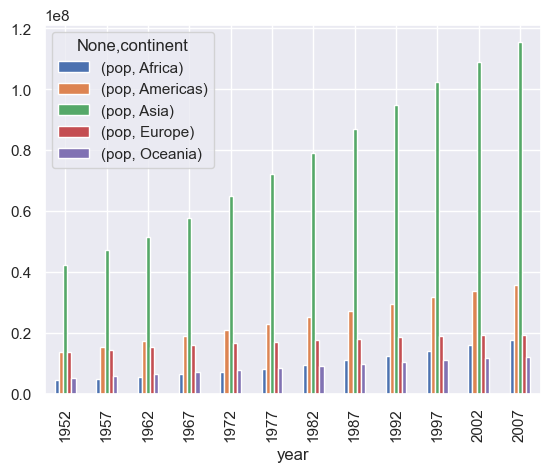

In [56]:
#La forma más simple
table_pop.plot(kind='bar');

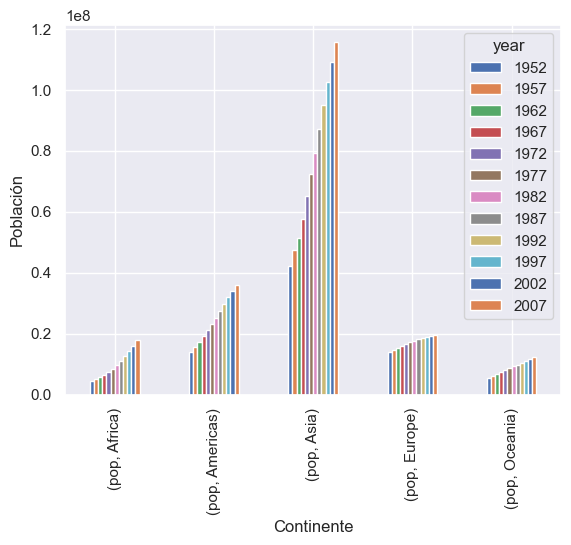

In [50]:
#Usando matplotlib, .T cambia continente y año
ax = table_pop.T.plot(kind='bar',xlabel = "Continente", ylabel= "Población")

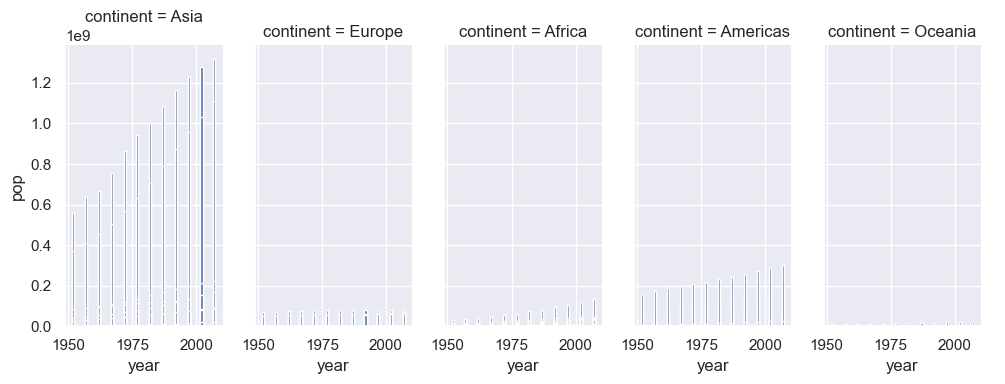

In [51]:
#Usando seaborn, se puede graficar directamente desde el dataset original

# Crea el entramado (facetgrid) vacio
graph = sns.FacetGrid(gapminder, col="continent", height=4, aspect= 0.5)

# Carga los datos
graph.map(plt.bar, "year", "pop")
# Añade llave
graph.add_legend()
plt.show()

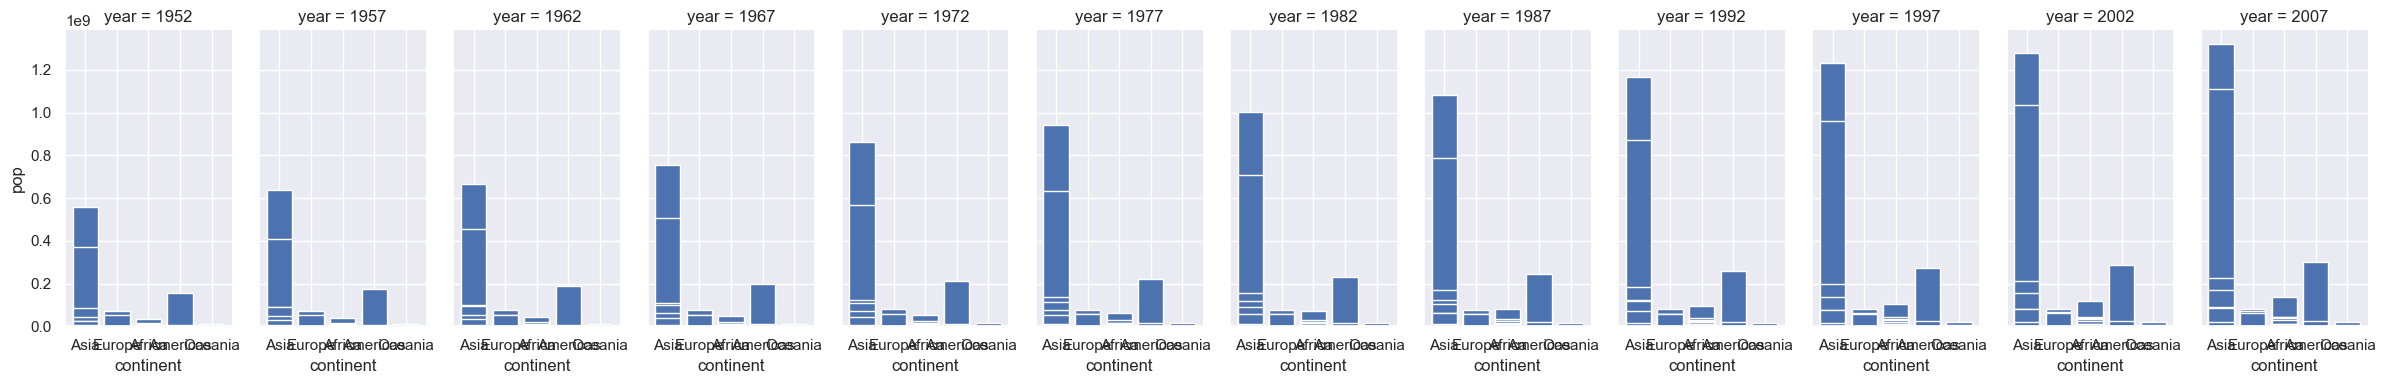

In [52]:
#Salió algo feo el primer intento, probemos de nuevo
# Crea el entramado (facetgrid) vacio
graph = sns.FacetGrid(gapminder, col="year",
height=4, aspect= 0.5)

# Carga los datos
graph.map(plt.bar, "continent", "pop")
# Añade llave
graph.add_legend()
plt.show()

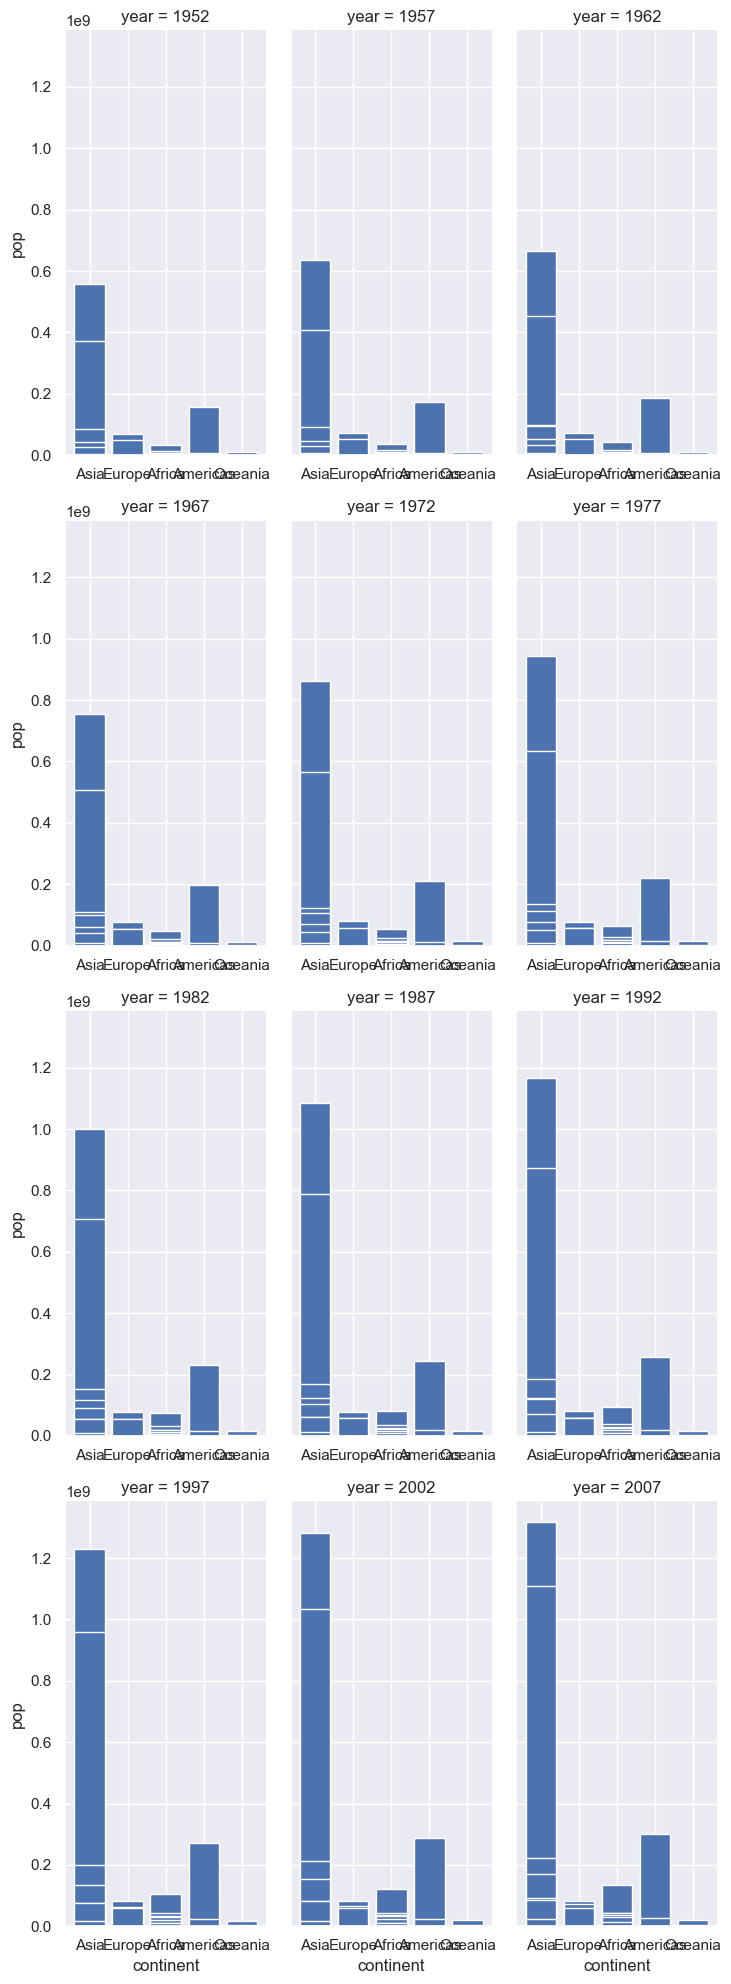

In [53]:
#Mejorando, ahora hagamos que las columnas puedan dar la vuelta
# Crea el entramado (facetgrid) vacio
graph = sns.FacetGrid(gapminder, col="year", height=5, aspect= 0.5,col_wrap=3, sharex= False)

# Carga los datos
graph.map(plt.bar, "continent", "pop")

plt.show()

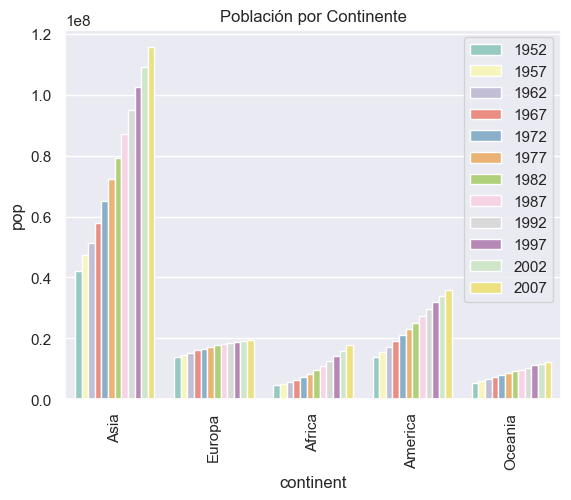

In [58]:
ax = sns.barplot(x = "continent", y = "pop", hue = "year", data =gapminder, palette =
"Set3",errorbar=None)

plt.legend(loc = "best")
plt.title("Población por Continente")
ax.set_xticklabels(labels= ["Asia","Europa","Africa","America","Oceania"],rotation=90)

plt.show()